In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf


In [39]:
#import cleanesd
df = pd.read_csv('cleaned_data.csv')


In [40]:
#corr matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')



,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,history,horror,music,musical,mystery,romance,sci_fi,sport,thriller,war,western
num_critic_for_reviews,1.000000,0.224428,0.184201,0.251011,0.208556,0.476112,0.609488,0.279639,-0.029553,0.567873,0.104204,0.445571,0.279925,0.363646,0.211153,0.715013,0.035448,0.070515,0.081637,0.003661,0.015624,-0.117608,-0.025830,-0.036572,-0.029670,-0.040185,0.035676,0.004531,0.039019,-0.047732,-0.032562,0.041488,-0.071800,0.101835,-0.041167,0.050069,-0.012295,-0.013409
duration,0.224428,1.000000,0.178931,0.121257,0.106689,0.214021,0.329015,0.143359,0.040247,0.362334,0.056243,-0.135182,0.146210,0.353248,0.190911,0.201822,0.006688,0.039464,0.039612,-0.113183,0.095611,-0.160403,0.007413,-0.027058,0.112120,-0.105399,-0.045429,0.142047,-0.084579,-0.002556,-0.003576,0.003537,0.004699,0.002827,0.010512,-0.000131,0.117790,0.059847
director_facebook_likes,0.184201,0.178931,1.000000,0.120922,0.116678,0.122583,0.292165,0.145200,-0.041344,0.212808,0.013953,-0.025982,0.137043,0.189659,0.048372,0.171394,0.021791,0.002382,0.003368,-0.019750,0.039951,-0.039883,0.020375,-0.013118,0.023577,-0.018861,-0.009126,0.020373,-0.032929,-0.012658,-0.001131,0.020703,-0.022475,0.001986,0.010041,0.013944,0.019263,0.011730
actor_3_facebook_likes,0.251011,0.121257,0.120922,1.000000,0.285769,0.288565,0.276162,0.551871,0.111432,0.212535,0.033419,0.120294,0.602350,0.071753,0.057218,0.264954,0.050731,0.019503,0.057037,0.000520,-0.006079,-0.017207,-0.020015,-0.022887,-0.019054,0.011658,0.047926,-0.000074,-0.027493,-0.024040,-0.009770,-0.009862,-0.002261,0.020058,-0.008808,-0.010720,-0.001729,-0.010005
actor_1_facebook_likes,0.208556,0.106689,0.116678,0.285769,1.000000,0.173135,0.214216,0.932273,0.056142,0.153558,0.016497,0.124029,0.444422,0.113429,0.091414,0.164089,0.033934,0.026368,0.022102,-0.004887,0.015883,-0.031927,0.021254,-0.035691,0.005180,-0.004718,0.013416,-0.013021,-0.037817,-0.030537,-0.024861,0.002187,-0.015216,0.002035,-0.006982,0.024091,-0.004738,0.013533
gross,0.476112,0.214021,0.122583,0.288565,0.173135,1.000000,0.641477,0.266763,-0.040892,0.551155,0.089921,0.078680,0.267771,0.236789,0.060769,0.372837,0.201270,0.083584,0.159315,0.092961,-0.041884,-0.030851,-0.062927,-0.032403,-0.116448,0.097315,0.087722,-0.030861,-0.058235,-0.027611,0.001973,-0.027389,-0.045246,0.076707,-0.019128,-0.038406,-0.023657,-0.012913
num_voted_users,0.609488,0.329015,0.292165,0.276162,0.214216,0.641477,1.000000,0.288863,-0.030582,0.774504,0.061196,0.049843,0.278084,0.494071,0.097999,0.513134,0.125654,0.076924,0.094567,0.011155,-0.008301,-0.080434,0.001374,-0.035566,-0.030269,-0.022285,0.039826,-0.010062,-0.039464,-0.045348,-0.023789,0.014000,-0.053919,0.089119,-0.031274,0.012562,-0.000275,-0.004430
cast_total_facebook_likes,0.279639,0.143359,0.145200,0.551871,0.932273,0.266763,0.288863,1.000000,0.085601,0.216289,0.027778,0.152753,0.706831,0.128256,0.101322,0.241069,0.049964,0.033454,0.040156,-0.003015,0.012525,-0.035042,0.015020,-0.040534,-0.002791,-0.000840,0.024061,-0.012649,-0.043995,-0.033545,-0.024947,-0.003333,-0.015105,0.010991,-0.010319,0.016599,-0.005478,0.011391
facenumber_in_poster,-0.029553,0.040247,-0.041344,0.111432,0.056142,-0.040892,-0.030582,0.085601,1.000000,-0.073034,-0.022895,0.057988,0.089389,-0.051224,0.038130,0.018357,0.010671,-0.001493,-0.017400,-0.059497,-0.015066,0.111999,0.022468,-0.019585,0.010779,-0.013764,-0.024475,-0.010540,-0.074709,0.026314,0.004712,-0.031617,0.051013,-0.034224,0.001115,-0.037835,-0.008286,-0.007536
num_user_for_reviews,0.567873,0.362334,0.212808,0.212535,0.153558,0.551155,0.774504,0.216289,-0.073034,1.000000,0.065128,0.043193,0.220358,0.321748,0.128148,0.365802,0.095620,0.0909

In [41]:
#find variables correlated with gross
corr_gross = corr['gross']
corr_gross = corr_gross.sort_values(ascending=False)
corr_gross = corr_gross[1:11]
corr_gross


num_voted_users              0.641477
num_user_for_reviews         0.551155
num_critic_for_reviews       0.476112
movie_facebook_likes         0.372837
actor_3_facebook_likes       0.288565
actor_2_facebook_likes       0.267771
cast_total_facebook_likes    0.266763
imdb_score                   0.236789
duration                     0.214021
profit                       0.201270
Name: gross, dtype: float64

In [42]:
corr_rev = corr['gross']
corr_rev = corr_rev.sort_values(ascending=False)
corr_rev = corr_rev[1:11]
corr_rev


num_voted_users              0.641477
num_user_for_reviews         0.551155
num_critic_for_reviews       0.476112
movie_facebook_likes         0.372837
actor_3_facebook_likes       0.288565
actor_2_facebook_likes       0.267771
cast_total_facebook_likes    0.266763
imdb_score                   0.236789
duration                     0.214021
profit                       0.201270
Name: gross, dtype: float64

In [43]:
#pairplot of data for all col
sns.pairplot(df)



KeyboardInterrupt: 

In [ ]:
#preform feature selection to find var's coorelated with gross

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')




In [ ]:
train

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,horror,music,musical,mystery,romance,sci_fi,sport,thriller,war,western
0,Dean Parisot,213.0,102.0,23.0,436.0,Enrico Colantoni,25000.0,71423726.0,comedy,Alan Rickman,...,0,0,0,0,0,0,0,0,0,0
1,Clint Eastwood,264.0,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,crime,Angelina Jolie Pitt,...,0,0,0,0,0,0,0,0,0,0
2,Mike Newell,56.0,124.0,179.0,551.0,Kurt Fuller,11000.0,8406264.0,comedy,Angelina Jolie Pitt,...,0,0,0,0,0,0,0,0,0,0
3,Joe Nussbaum,72.0,108.0,18.0,433.0,Matt Long,714.0,11702090.0,comedy,Danny Strong,...,0,0,0,0,0,0,0,0,0,0
4,Johnny Remo,2.0,112.0,74.0,891.0,Randy Wayne,260000.0,96734.0,drama,Matthew Ziff,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8984,Scott Frank,253.0,114.0,71.0,313.0,Boyd Holbrook,14000.0,25977365.0,thriller,Liam Neeson,...,0,0,0,0,0,0,0,1,0,0
8985,John Glen,108.0,131.0,46.0,433.0,Alison Doody,1000.0,50300000.0,action,Patrick Macnee,...,0,0,0,0,0,0,0,0,0,0
8986,Neil Jordan,62.0,100.0,277.0,210.0,Aidan Quinn,21000.0,11900000.0,fantasy,Robert Downey Jr.,...,0,0,0,0,0,0,0,0,0,0
8987,Kirk De Micco,257.0,98.0,16.0,12000.0,Emma Stone,16000.0,187165546.0,animation,Ryan Reynolds,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'musical', 'mystery', 'romance', 'sci_fi', 'sport', 'thriller',
       'war', 'western'],
      dtype='object')

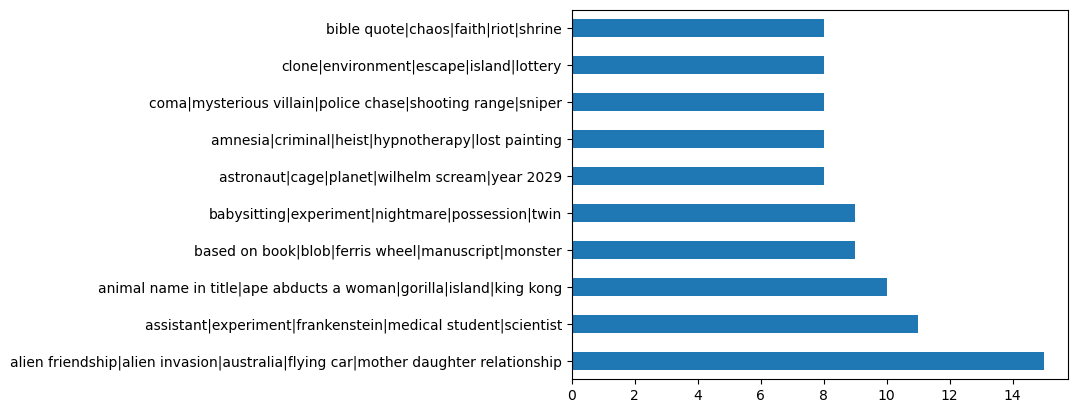

In [ ]:
#bar chart to see top 10 plot_keywords
train['plot_keywords'].value_counts().head(10).plot(kind='barh')
#show plot
plt.show()




In [44]:
keyword_train = train['plot_keywords'].str.get_dummies(sep='|')
# merge new dataframe with original dataframe
train = pd.concat([train, keyword_train], axis=1)



KeyError: 'plot_keywords'

In [ ]:
train.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci_fi', 'sport', 'thriller', 'war', 'western'],
      dtype='object')

In [ ]:
#columns not relevant to investigation

columns_to_drop = ['director_name','actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', ]